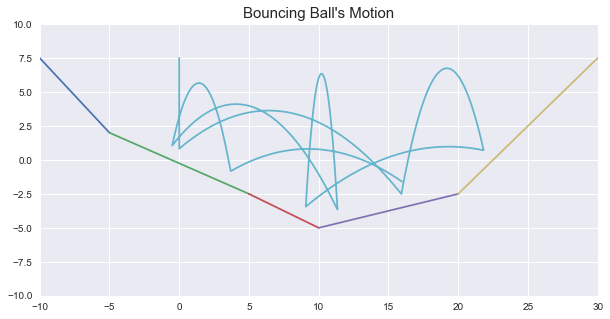

In [260]:
from numpy import array,pi,cos,sin,radians,transpose,pi,linspace
from numpy.linalg import norm
from matplotlib import pyplot as plt, style
style.use('seaborn')
%matplotlib inline
def Projection(c,L,P):
    L = L - c
    P = P - c
    L_P = L[0] * P[0] + L[1] * P[1]
    L_L = L[0]**2 + L[1]**2
    Ratio = L_P/L_L
    if Ratio >= 1:
        return L + c
    if Ratio <= 0:
        return c
    else:
        return Ratio*L + c
class Line():
    def __init__(self,p1,p2,ID=1):
        self.p1 = array(p1)
        self.p2 = array(p2)
        self.id = ID
    def info(self,that):
        self.Proj = Projection(self.p1,self.p2,that.p[-1])
        self.UnitVector = (that.p[-1] - self.Proj)/norm(that.p[-1] - self.Proj)
        return Projection(self.p1,self.p2,that.p[-1])
    def draw(self):
        T = array([self.p1,self.p2]).T
        plt.plot(T[0],T[1],"-")
class ball():
    def __init__(self,p,lines,v=[0.0,0.0],r = 1,w = 0,m = 10,dt = 0.001):
        self.lines = lines
        self.p = [array(p)]
        self.v = [array(v)]
        self.r = r
        self.w = w
        self.m = m
        self.t = [0.0]
        self.θ = [0.0]
        self.dt = dt
        self.N = [0]
    def acceleration(self):
        netF = self.normalF()# + self.dragF()
        #self.normalF()
        netF[1] += -9.8*self.m
        return netF/self.m
    def dragF(self):
        𝜌 = 1.29
        𝐶 = 0.5  
        𝐴 = pi * (self.r)**2
        Fx = 1/2 * 𝐶 *𝜌 * 𝐴 * norm(self.v[-1]) * -self.v[-1][0]
        Fy = 1/2 * 𝐶 *𝜌 * 𝐴 * norm(self.v[-1]) * -self.v[-1][1]
        return array([Fx,Fy])
    def normalF(self):
        fN = array([0.0,0.0])
        for line in self.lines:
            line.info(self)
            dist = norm(line.Proj-self.p[-1])
            k = 5000000
            if dist < self.r:
                #self.dt = 0.001
                #plt.plot(line.Proj[0],line.Proj[1],".")
                #self.v[-1] *= 0.99
                Fm = k*(self.r-dist)
                
                fN += Fm * line.UnitVector
                #plt.plot(self.p[-1][0],self.p[-1][1],".")

        self.N.append(norm(fN))
        return fN     
    def motion(self):
        while self.t[-1] < 15:
            a = self.acceleration()
            self.v.append(self.v[-1]+a*self.dt)
            self.p.append(self.p[-1]+self.v[-1]*self.dt)
            self.t.append(self.t[-1] + self.dt)       
    def draw(self):
        P = array(self.p).T
        plt.plot(P[0],P[1],"-",ms=1)
        plt.xlim(-10,30)
        plt.ylim(-10,10)
    def animate(self):
        from matplotlib import style
        %matplotlib
        A = linspace(0,2*pi,20)
        plt.figure(figsize = (20,10))
        for p in self.p[::100]:
            plt.clf()  # Clear the canvas, otherwise all plots end up on top of each other 
            plt.xlim(-10,30)
            plt.ylim(-10,10)
            for line in self.lines:
                line.draw()
            plt.plot(p[0] + self.r*sin(A),p[1]+ self.r*cos( A),"-")
            #plt.plot(i[0] + r*sin(i[2]+ A2),i[1]+ r*cos(i[2] + A2),".k")
            plt.plot(p[0],p[1],".") 
            plt.draw()
            plt.pause(0.1)
        plt.close()
    def plotNormalF(self):
        plt.show()
        self.N = array(self.N)
        self.t = array(self.t)
        P = array(self.N) != 0
        plt.plot(self.t,self.N,"-",ms=1)
        plt.show()
        plt.plot(self.t[P],self.N[P],"-",ms=1)
        
        T = [[self.t[P][0]] if i == 0 else 0 for i in range(23)]
        N = [[self.N[P][0]] if i == 0 else 0 for i in range(23)]
        j=0
        for i,t in enumerate(self.t[P][1:]):
            if self.t[P][i] - self.t[P][i-1] > self.dt + 1e-6:
                j +=1
                T[j] = [self.t[P][i]]
                N[j] = [self.N[P][i]]
            else:
                T[j].append(self.t[P][i])
                N[j].append(self.N[P][i])
        plt.show()
        fig, axs = plt.subplots(1, 7, figsize=(15, 5), constrained_layout=True)
        #plt.title("Normal force vs time")
        fig.suptitle('Normal/Spring force vs time', fontsize=30)
        for i,ax in enumerate(axs.flat):
            ax.plot(T[i],N[i])
plt.figure(figsize = (10,5))
Points = []
Points = [[-10.0,7.5],[-5.0,2.0],[5.0,-2.5],[10.0,-5.0],[20.0,-2.5],[30.0,7.5]]
lines = []
for i,Point in enumerate(Points[1:]):
    lines.append(Line(Points[i],Point,ID = i))
for line in lines:
    line.draw()
BB = ball([0.0,7.5],lines)         
BB.motion()
plt.title("Bouncing Ball's Motion", fontsize=15)
BB.draw()
#BB.plotNormalF()

In [246]:
BB.animate()

Using matplotlib backend: QtAgg


# Same code as above just with the rotation physics added

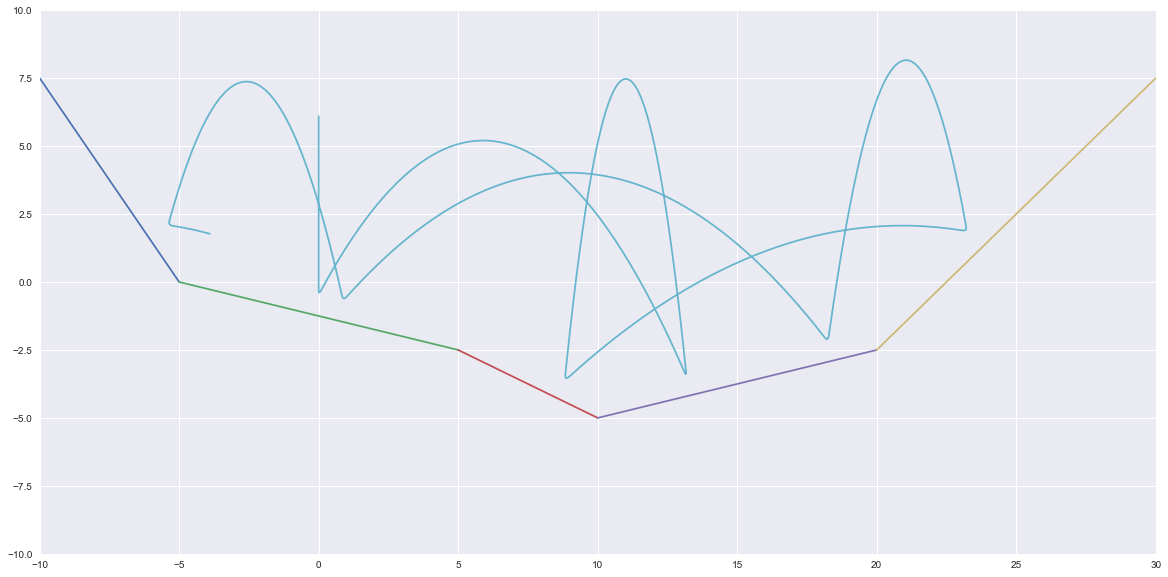

In [240]:
from numpy import array,pi,cos,sin,radians,transpose,pi,linspace
from numpy.linalg import norm
from matplotlib import pyplot as plt
%matplotlib inline
class ball():
    def __init__(self,p,lines,v=[0.0,0.0],r = 1,w = 0,m = 10,dt = 0.01):
        self.lines = lines
        self.p = [array(p)]
        self.v = [array(v)]
        self.r = r
        self.w = [w]
        self.m = m
        self.t = [0.0]
        self.θ = [0.0]
        self.dt = dt
        self.μk = 0.2
        self.μs = 0.6
        self.I = 1/2 * self.m * self.r**2
        self.N = 0
    def acceleration(self):
        netF = self.normalF()# + self.dragF()#*self.scale
        #self.normalF()
        netF[1] += -9.8*self.m
        return netF/self.m
    def dragF(self):
        𝜌 = 1.29
        𝐶 = 0.5  
        𝐴 = pi * (self.r)**2
        Fx = 1/2 * 𝐶 *𝜌 * 𝐴 * norm(self.v[-1]) * -self.v[-1][0]
        Fy = 1/2 * 𝐶 *𝜌 * 𝐴 * norm(self.v[-1]) * -self.v[-1][1]
        return array([Fx,Fy])
    def normalF(self):
        fN = array([0.0,0.0])
        for line in self.lines:
            line.info(self)
            dist = norm(line.Proj-self.p[-1])
            k = 50000
            if dist < self.r:
                #self.v[-1] *= 0.9
                self.N = k*(self.r-dist)
                fN += self.N * line.UnitVector
        return fN     
    def motion(self):
        while self.t[-1] < 15:
            a = self.acceleration()
            self.torqueA()
            self.w.append(self.w[-1])
            self.v.append(self.v[-1]+a*self.dt)
            self.θ.append(self.θ[-1] + self.w[-1]*self.dt)
            self.p.append(self.p[-1]+self.v[-1]*self.dt)
            self.t.append(self.t[-1] + self.dt)       
    def draw(self):
        P = array(self.p).T
        plt.plot(P[0],P[1],"-",ms=1)
        plt.xlim(-10,30)
        plt.ylim(-10,10)
    def energyCoservation(self,wF,Vi):
        dV = ((self.I*self.w[-1]**2 - self.I*(wF)**2 + self.m* Vi**2) /self.m)**0.5 - Vi
        return dV
    def torqueA(self):
        TotalW = 0
        for line in self.lines:
            line.info(self)
            dist = norm(line.Proj-self.p[-1])
            
            if dist <= self.r:
                D = line.Proj - self.p[-1]
                L = array([D[1],-D[0]])
                Torque = sum(L*self.v[-1])/norm(L)
                
                frictionFk = self.N * self.μk
                frictionFs = self.N * self.μs
                #dV = self.energyCoservation(-Torque/self.r,Torque)
                #self.v[-1] += dV * L/norm(L) * self.dt
                self.w[-1] = -Torque/self.r
    
    def animate(self):
        from matplotlib import style
        %matplotlib
        A = linspace(0,2*pi,20)
        A2 = linspace(0,2*pi,7)
        plt.figure(figsize = (20,10))
        for p,θ in zip(self.p[::10],self.θ[::10]):
            plt.clf()  # Clear the canvas, otherwise all plots end up on top of each other 
            plt.xlim(-10,30)
            plt.ylim(-10,10)
            for line in self.lines:
                line.draw()
            plt.plot(p[0] + self.r*sin(A),p[1]+ self.r*cos(A),"-")
            plt.plot(p[0] + self.r*sin(θ +A2),p[1]+ self.r*cos(θ +  A2),".k")
            plt.plot(p[0],p[1],".") 
            plt.draw()
            plt.pause(0.1)
        plt.close()
        
plt.figure(figsize = (20,10))
Points = []

Points = [[-10.0,7.5],[-5.0,0.0],[5.0,-2.5],[10.0,-5.0],[20.0,-2.5],[30.0,7.5]]
#Points = [[-10,7.5],[30,-5]]
#Points = [[-10,7.5],[10,2.5],[30,5]]
#Points = [[20,7.5],[-10,-5]]
#Points = [[-1,7.5],[-1,-5]]
#Points = [[-1,7.5],[-1,-5]]
lines = []
for i,Point in enumerate(Points[1:]):
    lines.append(Line(Points[i],Point,ID = i))
for line in lines:
    line.draw()
BB = ball([15.0,7.5],lines)      
BB = ball([0.0,6.1],lines)   
BB.motion()
BB.draw()

In [241]:
BB.animate()

Using matplotlib backend: QtAgg
